<a href="https://colab.research.google.com/github/Shibata18/DataSciencePandas/blob/master/5_12_An%C3%A1lise_temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **5.12 - Análise temporal**



1.   Recuperação dos dados
Recuperar os dados de visualização sobre a cidade de Phoenix agrupados por dia, por mês e por ano;

2.   Ordenar as observações de forma ascendente temporalmente (da observação mais antiga para a observação mais recente).

1.  Visualização dos dados em forma de Série Temporal:
Observar o gráfico em barras da série temporal para o ano x de forma a investigar como se comporta a distribuição das visualizações.
2.   Observar o gráfico de linha da evolução do número de observações ao longo do tempo (anos)

1. Construção dos conjuntos de Treinamento e Teste:
Separar 70% das observações para treinamento e 30% das observações para teste (como se trata de uma informação temporal, não podemos pegar uma amostra aleatória, sugestão: calcular o índice que corresponde a 70% das observações e considerar da primeira amostra até ele para treinamento; e do índice seguinte até o final para teste).
1.   nvestigar os parâmetros para discriminar o melhor modelo:
Utilizando o pacote statsmodels, vamos testar uma família de métodos apropriados para lidar com previsão de séries temporais chamados conjuntamente de SARIMAX (Links para um site externo.), ou seja, utilize a função SARIMAX para criar um modelo;

2.   Em seguida, chame a função fit() para ajustar o modelo;
Para medir a qualidade do modelo ajustado, acesse a propriedade AIC do resultado (dica: o Critério de Informação de Akaike é uma métrica "quanto menor melhor", dessa forma, ao comparar modelos diferentes, aquele que possuir o menor valor de AIC é o melhor.
1. Exemplo de qualidade do modelo de acordo com o parâmetro AIC:
A qualidade do modelo estimada pelo AIC é: 1085.2222824883293
A última etapa é realizar uma previsão utilizando o melhor modelo:
2. Utilizando a função forecast sobre o modelo ajustado, faça uma previsão apropriada para a quantidade de dias que existem no seu conjunto de teste;
Calcule o erro médio e o desvio-padrão com relação ao seu conjunto de testes.
O erro médio foi de: 12.5 % e o desvio-padrão foi de: 44.45 %







In [ ]:
import pandas as pd

In [ ]:
ovnis_preparado = pd.read_csv('df_OVNI_preparado.csv')
ovnis_preparado

,City,State,Shape,Sight_day,Sight_month,Sight_time,Sight_date,Sight_weekday
0,Solomons Island,MD,Disk,22,9,20:00:00,1997-09-22,Segunda-feira
1,Annapolis,MD,Triangle,15,8,23:00:00,1998-08-15,Sábado
2,Chesapeak Bay,MD,Disk,26,10,20:00:00,1999-10-26,Terça-feira
3,Frederick,MD,Sphere,7,7,01:45:00,2000-07-07,Sexta-feira
4,Wheaton,MD,Triangle,1,10,20:00:00,2000-10-01,Domingo
...,...,...,...,...,...,...,...,...
54938,"Washington, D.C. (above I-295 bridge)",DC,Flash,13,3,05:40:00,2016-03-13,Domingo
54939,"Washington, D.C.",DC,Circle,12,4,01:30:00,2016-04-12,Terça-feira
54940,Washington,DC,Triangle,8,8,22:00:00,2016-08-08,Segunda-feira
54941,"Washington, D.C.",DC,Other,2,10,11:00:00,2016-10-02,Domingo


In [ ]:
cidade_phoenix = ovnis_preparado[ovnis_preparado['City']=='Phoenix']
cidade_phoenix.sort_values(by='Sight_date')

,City,State,Shape,Sight_day,Sight_month,Sight_time,Sight_date,Sight_weekday
24043,Phoenix,AZ,Disk,12,6,02:30:00,1999-06-12,Sábado
24061,Phoenix,AZ,Changing,12,11,23:33:00,2001-11-12,Segunda-feira
24073,Phoenix,AZ,Cigar,31,5,13:00:00,2003-05-31,Sábado
24090,Phoenix,AZ,Light,21,2,18:00:00,2005-02-21,Segunda-feira
24091,Phoenix,AZ,Light,20,3,03:30:00,2005-03-20,Domingo
...,...,...,...,...,...,...,...,...
26019,Phoenix,AZ,Other,15,6,15:35:00,2017-06-15,Quinta-feira
26035,Phoenix,AZ,Oval,6,7,21:25:00,2017-07-06,Quinta-feira
26031,Phoenix,AZ,Fireball,26,7,04:20:00,2017-07-26,Quarta-feira
26050,Phoenix,AZ,Flash,4,8,21:15:00,2017-08-04,Sexta-feira


In [ ]:
import pandasql

In [ ]:
# Executa o seu comando SQL e retorna um dataframe
query = '''
 SELECT Sight_date ,Count(*) as Views FROM cidade_phoenix  group by Sight_day,  Sight_month order by Sight_date 
'''
views_phoenix= pandasql.sqldf(query.lower(), locals())
views_phoenix

,Sight_date,views
0,2001-11-12,1
1,2003-05-31,1
2,2005-06-08,1
3,2005-10-15,2
4,2006-04-30,1
...,...,...
198,2017-06-15,2
199,2017-07-06,1
200,2017-07-26,2
201,2017-08-04,1


In [ ]:
views_phoenix['Sight_date'] = pd.to_datetime(views_phoenix['Sight_date'])
views_phoenix.dtypes

Sight_date    datetime64[ns]
views                  int64
dtype: object

In [ ]:
views_phoenix['Sight_year'] = views_phoenix['Sight_date'].dt.year
views_phoenix

,Sight_date,views,Sight_year
0,2001-11-12,1,2001
1,2003-05-31,1,2003
2,2005-06-08,1,2005
3,2005-10-15,2,2005
4,2006-04-30,1,2006
...,...,...,...
198,2017-06-15,2,2017
199,2017-07-06,1,2017
200,2017-07-26,2,2017
201,2017-08-04,1,2017


In [ ]:
views_phoenix['Sight_year'].unique()

array([2001, 2003, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017])

In [ ]:
views_phoenix['Sight_month'] = views_phoenix['Sight_date'].dt.month

In [ ]:
# Executa o seu comando SQL e retorna um dataframe
query = '''
 SELECT Count(*) as views, Sight_year,Sight_month FROM views_phoenix where Sight_year = 2001 group by Sight_year,Sight_month 
'''
year_2001= pandasql.sqldf(query.lower(), locals())
dictionary  = {'views':[0,0,0,0,0,0,0,0,0,0,0],'Sight_year':[2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001],'Sight_month':[1,2,3,4,5,6,7,8,9,10,12]}
views_phoenix_year_2001 =  pd.concat([year_2001,pd.DataFrame(dictionary)])
views_phoenix_year_2001.sort_values(by='Sight_month')

,views,Sight_year,Sight_month
0,0,2001,1
1,0,2001,2
2,0,2001,3
3,0,2001,4
4,0,2001,5
5,0,2001,6
6,0,2001,7
7,0,2001,8
8,0,2001,9
9,0,2001,10


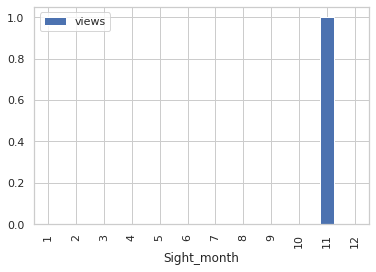

In [ ]:
views_phoenix_year_2001.sort_values(by='Sight_month').plot.bar(x='Sight_month',y='views')

In [ ]:
# Executa o seu comando SQL e retorna um dataframe
query = '''
 SELECT Count(*) as views, Sight_year,Sight_month FROM views_phoenix where Sight_year = 2003 group by Sight_year,Sight_month 
'''
year_2003= pandasql.sqldf(query.lower(), locals())
dictionary  = {'views':[0,0,0,0,0,0,0,0,0,0,0],'Sight_year':[2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003],'Sight_month':[1,2,3,4,6,7,8,9,10,11,12]}
views_phoenix_year_2003 =  pd.concat([year_2003,pd.DataFrame(dictionary)])
views_phoenix_year_2003.sort_values(by='Sight_month')

,views,Sight_year,Sight_month
0,0,2003,1
1,0,2003,2
2,0,2003,3
3,0,2003,4
0,1,2003,5
4,0,2003,6
5,0,2003,7
6,0,2003,8
7,0,2003,9
8,0,2003,10


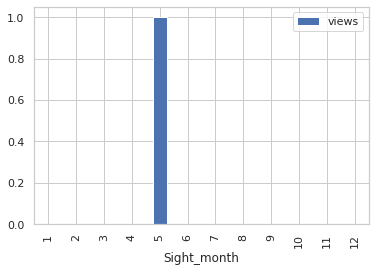

In [ ]:
views_phoenix_year_2003.sort_values(by='Sight_month').plot.bar(x='Sight_month',y='views')

In [ ]:
# Executa o seu comando SQL e retorna um dataframe
query = '''
 SELECT Count(*) as views, Sight_year,Sight_month FROM views_phoenix where Sight_year = 2005 group by Sight_year,Sight_month 
'''
year_2005= pandasql.sqldf(query.lower(), locals())
dictionary  = {'views':[0,0,0,0,0,0,0,0,0,0],'Sight_year':[2005,2005,2005,2005,2005,2005,2005,2005,2005,2005],'Sight_month':[1,2,3,4,5,7,8,9,11,12]}
views_phoenix_year_2005 =  pd.concat([year_2005,pd.DataFrame(dictionary)])
views_phoenix_year_2005.sort_values(by='Sight_month')

,views,Sight_year,Sight_month
0,0,2005,1
1,0,2005,2
2,0,2005,3
3,0,2005,4
4,0,2005,5
0,1,2005,6
5,0,2005,7
6,0,2005,8
7,0,2005,9
1,1,2005,10


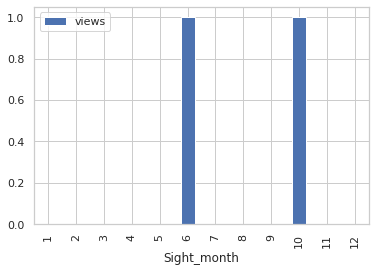

In [ ]:
views_phoenix_year_2005.sort_values(by='Sight_month').plot.bar(x='Sight_month',y='views')

In [ ]:
# Executa o seu comando SQL e retorna um dataframe
query = '''
 SELECT Count(*) as views, Sight_year,Sight_month FROM views_phoenix where Sight_year = 2006 group by Sight_year,Sight_month 
'''
year_2006= pandasql.sqldf(query.lower(), locals())
dictionary  = {'views':[0,0,0,0],'Sight_year':[2006,2006,2006,2006],'Sight_month':[1,2,3,9]}
views_phoenix_year_2006 =  pd.concat([year_2006,pd.DataFrame(dictionary)])
views_phoenix_year_2006.sort_values(by='Sight_month')

,views,Sight_year,Sight_month
0,0,2006,1
1,0,2006,2
2,0,2006,3
0,1,2006,4
1,1,2006,5
2,2,2006,6
3,1,2006,7
4,2,2006,8
3,0,2006,9
5,1,2006,10


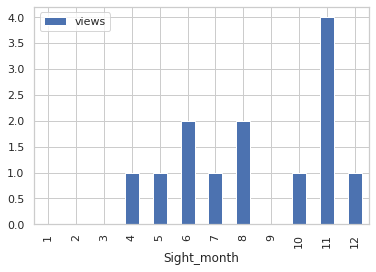

In [ ]:
views_phoenix_year_2006.sort_values(by='Sight_month').plot.bar(x='Sight_month',y='views')

In [ ]:
# Executa o seu comando SQL e retorna um dataframe
query = '''
 SELECT Count(*) as views, Sight_year,Sight_month FROM views_phoenix where Sight_year = 2007 group by Sight_year,Sight_month 
'''
year_2007= pandasql.sqldf(query.lower(), locals())
dictionary  = {'views':[0,0,0,0,0,0,0],'Sight_year':[2007,2007,2007,2007,2007,2007,2007],'Sight_month':[1,4,6,7,8,9,11]}
views_phoenix_year_2007 =  pd.concat([year_2007,pd.DataFrame(dictionary)])
views_phoenix_year_2007.sort_values(by='Sight_month')

,views,Sight_year,Sight_month
0,0,2007,1
0,1,2007,2
1,1,2007,3
1,0,2007,4
2,1,2007,5
2,0,2007,6
3,0,2007,7
4,0,2007,8
5,0,2007,9
3,1,2007,10


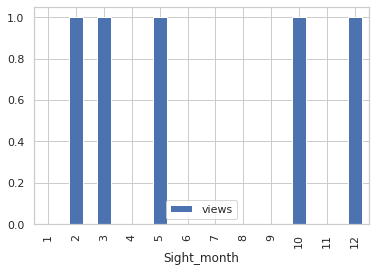

In [ ]:
views_phoenix_year_2007.sort_values(by='Sight_month').plot.bar(x='Sight_month',y='views')

In [ ]:
# Executa o seu comando SQL e retorna um dataframe
query = '''
 SELECT Count(*) as views, Sight_year,Sight_month FROM views_phoenix where Sight_year = 2008 group by Sight_year,Sight_month 
'''
year_2008= pandasql.sqldf(query.lower(), locals())
dictionary  = {'views':[0,0,0,0],'Sight_year':[2008,2008,2008,2008],'Sight_month':[6,8,9,12]}
views_phoenix_year_2008 =  pd.concat([year_2008,pd.DataFrame(dictionary)])
views_phoenix_year_2008.sort_values(by='Sight_month')

,views,Sight_year,Sight_month
0,2,2008,1
1,1,2008,2
2,2,2008,3
3,1,2008,4
4,2,2008,5
0,0,2008,6
5,3,2008,7
1,0,2008,8
2,0,2008,9
6,2,2008,10


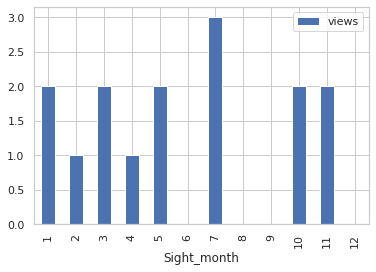

In [ ]:
views_phoenix_year_2008.sort_values(by='Sight_month').plot.bar(x='Sight_month',y='views')

In [ ]:
# Executa o seu comando SQL e retorna um dataframe
query = '''
 SELECT Count(*) as views, Sight_year,Sight_month FROM views_phoenix where Sight_year = 2009 group by Sight_year,Sight_month 
'''
year_2009= pandasql.sqldf(query.lower(), locals())
dictionary  = {'views':[0],'Sight_year':[2009],'Sight_month':[4]}
views_phoenix_year_2009 =  pd.concat([year_2009,pd.DataFrame(dictionary)])
views_phoenix_year_2009.sort_values(by='Sight_month')

,views,Sight_year,Sight_month
0,1,2009,1
1,1,2009,2
2,1,2009,3
0,0,2009,4
3,2,2009,5
4,1,2009,6
5,1,2009,7
6,1,2009,8
7,3,2009,9
8,1,2009,10


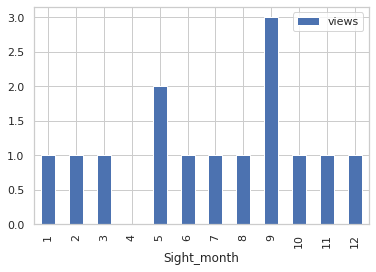

In [ ]:
views_phoenix_year_2009.sort_values(by='Sight_month').plot.bar(x='Sight_month',y='views')

In [ ]:
# Executa o seu comando SQL e retorna um dataframe
query = '''
 SELECT Count(*) as views, Sight_year,Sight_month FROM views_phoenix where Sight_year = 2010 group by Sight_year,Sight_month 
'''
year_2010= pandasql.sqldf(query.lower(), locals())
dictionary  = {'views':[0,0,0,0,0,0,0],'Sight_year':[2010,2010,2010,2010,2010,2010,2010],'Sight_month':[1,2,4,5,6,11,12]}
views_phoenix_year_2010 =  pd.concat([year_2010,pd.DataFrame(dictionary)])
views_phoenix_year_2010.sort_values(by='Sight_month')

,views,Sight_year,Sight_month
0,0,2010,1
1,0,2010,2
0,1,2010,3
2,0,2010,4
3,0,2010,5
4,0,2010,6
1,1,2010,7
2,3,2010,8
3,1,2010,9
4,3,2010,10


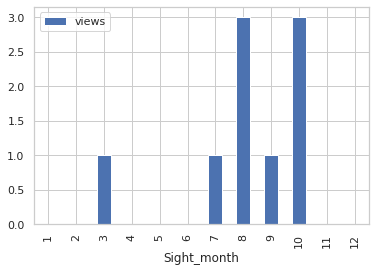

In [ ]:
views_phoenix_year_2010.sort_values(by='Sight_month').plot.bar(x='Sight_month',y='views')

In [ ]:
# Executa o seu comando SQL e retorna um dataframe
query = '''
 SELECT Count(*) as views, Sight_year,Sight_month FROM views_phoenix where Sight_year = 2011 group by Sight_year,Sight_month 
'''
year_2011= pandasql.sqldf(query.lower(), locals())
dictionary  = {'views':[0,0,0,0,0,0,0],'Sight_year':[2011,2011,2011,2011,2011,2011,2011],'Sight_month':[1,2,3,4,7,9,10]}
views_phoenix_year_2011 =  pd.concat([year_2011,pd.DataFrame(dictionary)])
views_phoenix_year_2011.sort_values(by='Sight_month')

,views,Sight_year,Sight_month
0,0,2011,1
1,0,2011,2
2,0,2011,3
3,0,2011,4
0,2,2011,5
1,1,2011,6
4,0,2011,7
2,1,2011,8
5,0,2011,9
6,0,2011,10


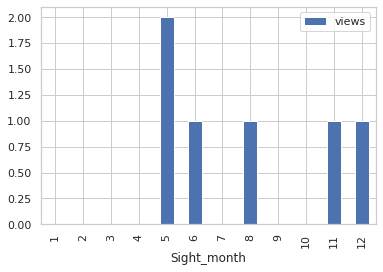

In [ ]:
views_phoenix_year_2011.sort_values(by='Sight_month').plot.bar(x='Sight_month',y='views')

In [ ]:
# Executa o seu comando SQL e retorna um dataframe
query = '''
 SELECT Count(*) as views, Sight_year,Sight_month FROM views_phoenix where Sight_year = 2012 group by Sight_year,Sight_month 
'''
year_2012= pandasql.sqldf(query.lower(), locals())
dictionary  = {'views':[0,0],'Sight_year':[2012,2012],'Sight_month':[4,6]}
views_phoenix_year_2012 =  pd.concat([year_2012,pd.DataFrame(dictionary)])
views_phoenix_year_2012.sort_values(by='Sight_month')

,views,Sight_year,Sight_month
0,2,2012,1
1,1,2012,2
2,1,2012,3
0,0,2012,4
3,1,2012,5
1,0,2012,6
4,1,2012,7
5,1,2012,8
6,1,2012,9
7,3,2012,10


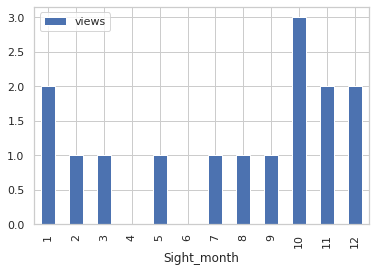

In [ ]:
views_phoenix_year_2012.sort_values(by='Sight_month').plot.bar(x='Sight_month',y='views')

In [ ]:
# Executa o seu comando SQL e retorna um dataframe
query = '''
 SELECT Count(*) as views, Sight_year,Sight_month FROM views_phoenix where Sight_year = 2013 group by Sight_year,Sight_month 
'''
year_2013= pandasql.sqldf(query.lower(), locals())
dictionary  = {'views':[0],'Sight_year':[2013],'Sight_month':[7]}
views_phoenix_year_2013 =  pd.concat([year_2013,pd.DataFrame(dictionary)])
views_phoenix_year_2013.sort_values(by='Sight_month')

,views,Sight_year,Sight_month
0,1,2013,1
1,1,2013,2
2,2,2013,3
3,2,2013,4
4,1,2013,5
5,1,2013,6
0,0,2013,7
6,2,2013,8
7,2,2013,9
8,1,2013,10


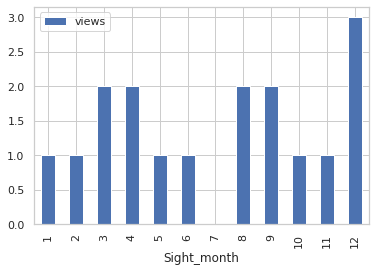

In [ ]:
views_phoenix_year_2013.sort_values(by='Sight_month').plot.bar(x='Sight_month',y='views')

In [ ]:
# Executa o seu comando SQL e retorna um dataframe
query = '''
 SELECT Count(*) as views, Sight_year,Sight_month FROM views_phoenix where Sight_year = 2014 group by Sight_year,Sight_month 
'''
year_2014= pandasql.sqldf(query.lower(), locals())
dictionary  = {'views':[0,0,0],'Sight_year':[2014,2014,2014],'Sight_month':[3,7,11]}
views_phoenix_year_2014 =  pd.concat([year_2014,pd.DataFrame(dictionary)])
views_phoenix_year_2014.sort_values(by='Sight_month')

,views,Sight_year,Sight_month
0,4,2014,1
1,1,2014,2
0,0,2014,3
2,4,2014,4
3,3,2014,5
4,1,2014,6
1,0,2014,7
5,4,2014,8
6,7,2014,9
7,1,2014,10


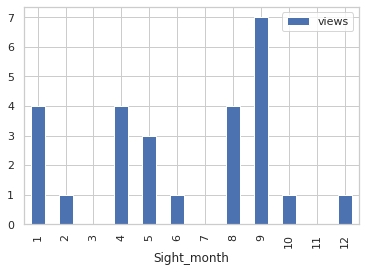

In [ ]:
views_phoenix_year_2014.sort_values(by='Sight_month').plot.bar(x='Sight_month',y='views')

In [ ]:
# Executa o seu comando SQL e retorna um dataframe
query = '''
 SELECT Count(*) as views, Sight_year,Sight_month FROM views_phoenix where Sight_year = 2015 group by Sight_year,Sight_month 
'''
year_2015= pandasql.sqldf(query.lower(), locals())
dictionary  = {'views':[0,0],'Sight_year':[2015,2015],'Sight_month':[6,10]}
views_phoenix_year_2015 =  pd.concat([year_2015,pd.DataFrame(dictionary)])
views_phoenix_year_2015.sort_values(by='Sight_month')

,views,Sight_year,Sight_month
0,4,2015,1
1,2,2015,2
2,3,2015,3
3,2,2015,4
4,2,2015,5
0,0,2015,6
5,3,2015,7
6,1,2015,8
7,4,2015,9
1,0,2015,10


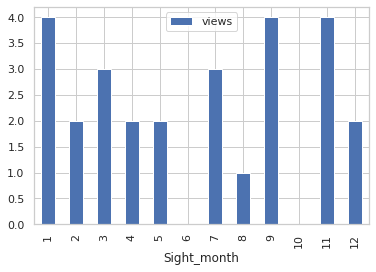

In [ ]:
views_phoenix_year_2015.sort_values(by='Sight_month').plot.bar(x='Sight_month',y='views')

In [ ]:
# Executa o seu comando SQL e retorna um dataframe
query = '''
 SELECT Count(*) as views, Sight_year,Sight_month FROM views_phoenix where Sight_year = 2016 group by Sight_year,Sight_month 
'''
year_2016= pandasql.sqldf(query.lower(), locals())
dictionary  = {'views':[0],'Sight_year':[2016],'Sight_month':[9]}
views_phoenix_year_2016 =  pd.concat([year_2016,pd.DataFrame(dictionary)])
views_phoenix_year_2016.sort_values(by='Sight_month')

,views,Sight_year,Sight_month
0,5,2016,1
1,3,2016,2
2,2,2016,3
3,1,2016,4
4,2,2016,5
5,5,2016,6
6,4,2016,7
7,2,2016,8
0,0,2016,9
8,2,2016,10


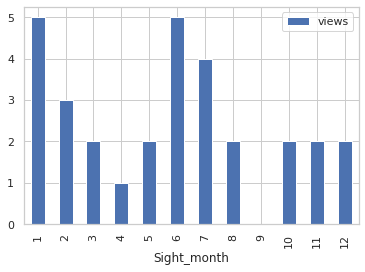

In [ ]:
views_phoenix_year_2016.sort_values(by='Sight_month').plot.bar(x='Sight_month',y='views')

In [ ]:
# Executa o seu comando SQL e retorna um dataframe
query = '''
 SELECT Count(*) as views, Sight_year,Sight_month FROM views_phoenix where Sight_year = 2017 group by Sight_year,Sight_month 
'''
views_phoenix_year_2017= pandasql.sqldf(query.lower(), locals())
views_phoenix_year_2017

,views,Sight_year,Sight_month
0,2,2017,1
1,3,2017,2
2,4,2017,3
3,2,2017,4
4,5,2017,5
5,2,2017,6
6,2,2017,7
7,2,2017,8


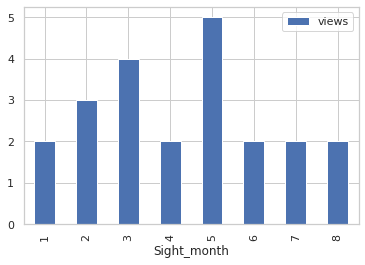

In [ ]:
views_phoenix_year_2017.sort_values(by='Sight_month').plot.bar(x='Sight_month',y='views')

In [ ]:
# Executa o seu comando SQL e retorna um dataframe
query = '''
 SELECT Count(*) as views, Sight_year FROM views_phoenix  group by Sight_year 
'''
views_phoenix_per_year= pandasql.sqldf(query.lower(), locals())
views_phoenix_per_year

,views,Sight_year
0,1,2001
1,1,2003
2,2,2005
3,13,2006
4,5,2007
5,15,2008
6,14,2009
7,9,2010
8,6,2011
9,15,2012


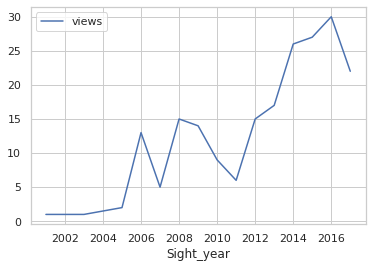

In [ ]:
views_phoenix_per_year.plot.line(x='Sight_year',y='views')